Importation des librairies.

In [1]:
import tensorflow as tf
from tensorflow import keras

2023-10-07 20:50:34.892059: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-07 20:50:34.893584: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-07 20:50:34.916710: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-07 20:50:34.916733: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-07 20:50:34.916750: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

Chargement des données.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Création des jeux de validation et d'entraînement.

In [3]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress",
               "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Construction du modèle.

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [6]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6979 - accuracy: 0.7716 - val_loss: 0.4961 - val_accuracy: 0.8338
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4818 - accuracy: 0.8325 - val_loss: 0.4470 - val_accuracy: 0.8438
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4378 - accuracy: 0.8456 - val_loss: 0.4236 - val_accuracy: 0.8566
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4119 - accuracy: 0.8556 - val_loss: 0.3955 - val_accuracy: 0.8652
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3927 - accuracy: 0.8619 - val_loss: 0.3864 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3772 - accuracy: 0.8673 - val_loss: 0.3752 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3641 - accuracy: 0.8709 - val_loss: 0.3734 - val_accuracy:

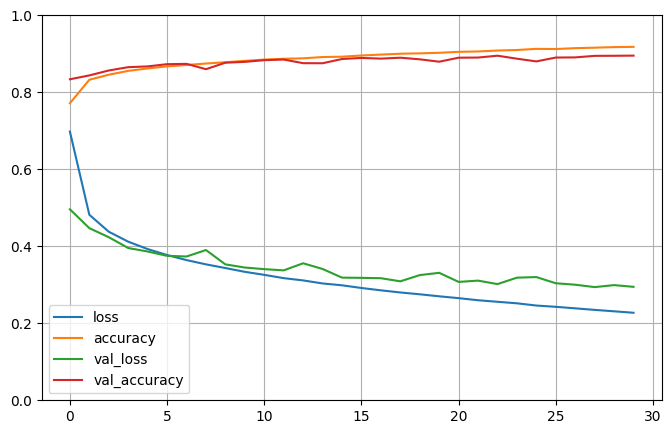

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Régler la plage verticale sur [0-1]
plt.show()